# **Project Name** - Predicting sales of a major offline drug stores

# **Summary**

This dataset is a live dataset of Rossmann Stores. On analsysing this problem we observe that Rossmann problem is a regression problem and our primarily goal is to predict the sales figures of Rossmann problem. In this Notebook we work on following topics

Analysing the Dataset by using Exploratory Data Analysis. Using Exponential Moving Averages analyse Trends and Seasonality in Roseman dataset. Analyse Regression analysis using following prediction analysis, A. Linear Regression Analysis B. Elastic Regression ( Lasso and Ridge Regression). C. Random Forest Regression. D. Xgboost).

By applying above algorthim we find accuracy of 98% by Xgboost.

# **Problem Statement**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.


# **Data Description**

**Id** - an Id that represents a (Store, Date) duple within the test set

**Store** - a unique Id for each store

**Sales** - the turnover for any given day (this is what you are predicting)

**Customers** - the number of customers on a given day

**Open** - an indicator for whether the store was open: 0 = closed, 1 = open

**StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

**SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools

**StoreType** - differentiates between 4 different store models: a, b, c, d

**Assortment** - describes an assortment level: a = basic, b = extra, c = extended

**CompetitionDistance** - distance in meters to the nearest competitor store

**CompetitionOpenSince[Month/Year]**- gives the approximate year and month of the time the nearest competitor was opened

**Promo** - indicates whether a store is running a promo on that day

**Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

**Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2

**PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


## ***1. Know Your Data***

# **Import Libraries**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
from datetime import datetime
import ast
import math
import random
from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
import lightgbm as lgb
from sklearn.metrics import confusion_matrix,classification_report
import pickle

### Dataset Loading

In [8]:
#Rosmann Data
sales_df = pd.read_csv('/content/Rossmann Stores Data.csv')
# Store Data
store_df = pd.read_csv('/content/store.csv')

<ipython-input-8-ffee4ba8731b>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_df = pd.read_csv('/content/Rossmann Stores Data.csv')


# General Overview of Dataset

In [9]:
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [10]:
sales_df.shape

(1017209, 9)

In [11]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [12]:
sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [13]:
sales_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [14]:
sales_df.nunique()

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64

In [15]:
# change state holiday value a,b,c is equal to 1
sales_df['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [16]:
# change datatype object into date format
sales_df['Date'].unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

In [17]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [18]:
store_df.shape

(1115, 10)

In [19]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [20]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [21]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [22]:
store_df.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

In [57]:
# store dataset fill into null values
store_df['CompetitionDistance'] = store_df['CompetitionDistance'].fillna(0)
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna(0)
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].fillna(0)
store_df['Promo2SinceWeek'] = store_df['Promo2SinceWeek'].fillna(0)
store_df['Promo2SinceYear'] = store_df['Promo2SinceYear'].fillna(0)
store_df['PromoInterval'] = store_df['PromoInterval'].fillna(0)

In [58]:
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [59]:
merge_df = pd.merge(sales_df, store_df, on = 'Store', how='left')
merge_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [61]:
merge_df.duplicated().sum()

0

In [60]:
# Change Data types object to int
merge_df.loc[merge_df['StateHoliday']=='0','StateHoliday'] = 0
merge_df.loc[merge_df['StateHoliday']=='a','StateHoliday'] = 1
merge_df.loc[merge_df['StateHoliday']=='b','StateHoliday'] = 2
merge_df.loc[merge_df['StateHoliday']=='c','StateHoliday'] = 3
# store the value with same column name i.e.StateHoliday with function astype
merge_df['StateHoliday'] = merge_df['StateHoliday'].astype(int,copy=False)

In [63]:
# change Data Types object into int
merge_df.loc[merge_df['Assortment'] == 'a', 'Assortment'] = 0
merge_df.loc[merge_df['Assortment'] == 'b', 'Assortment'] = 1
merge_df.loc[merge_df['Assortment'] == 'c', 'Assortment'] = 2
#store the value with same column name i.e Assortment with function astype
merge_df['Assortment'] = merge_df['Assortment'].astype(int, copy=False)

In [64]:
# change Data Types object into int
merge_df.loc[merge_df['StoreType'] == 'a', 'StoreType'] = 0
merge_df.loc[merge_df['StoreType'] == 'b', 'StoreType'] = 1
merge_df.loc[merge_df['StoreType'] == 'c', 'StoreType'] = 2
merge_df.loc[merge_df['StoreType'] == 'd', 'StoreType'] = 3
#store the value with same column name i.e Assortment with function astype
merge_df['StoreType'] = merge_df['StoreType'].astype(int, copy=False)

In [75]:
print(merge_df.nunique())

Store                         1115
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             2
Promo                            2
StateHoliday                     4
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            655
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        24
Promo2                           2
Promo2SinceWeek                 25
Promo2SinceYear                  8
PromoInterval                    4
dtype: int64


In [66]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  int64  
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  int64  
 10  Assortment                 1017209 non-null  int64  
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [69]:
 merge_df["Sales"].value_counts()

0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
23806         1
24183         1
20651         1
25083         1
23303         1
Name: Sales, Length: 21734, dtype: int64

In [70]:
# code for changing format of date from object to datetime
merge_df['Date'] = pd.to_datetime(merge_df['Date'], format= '%Y-%m-%d')

In [71]:
# code for change object into date format
merge_df['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(merge_df['Date']).month

In [72]:
# code for change float into integer
merge_df['CompetitionOpenSinceYear']= merge_df['CompetitionOpenSinceYear'].astype(int)
merge_df['Promo2SinceYear']= merge_df['Promo2SinceYear'].astype(int)
merge_df['CompetitionDistance']= merge_df['CompetitionDistance'].astype(int)
merge_df['Promo2SinceWeek']= merge_df['Promo2SinceWeek'].astype(int)

In [73]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

In [74]:
merge_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,0


# **EDA**

## **First We see Our Target variable counts i.e. Sales Column**

In [77]:
# Calculate total counts and percentages
sales_counts = merge_df['Sales'].value_counts()
sales_percentages = (sales_counts / len(merge_df)) * 100

# Create a DataFrame for the first 20 values and their counts/percentages
t = pd.DataFrame({'Sales': sales_counts.index, 'Count': sales_counts.values, 'Percentage': sales_percentages.values})
print(t)

       Sales   Count  Percentage
0          0  172871   16.994639
1       5674     215    0.021136
2       5558     197    0.019367
3       5483     196    0.019268
4       6214     195    0.019170
...      ...     ...         ...
21729  23806       1    0.000098
21730  24183       1    0.000098
21731  20651       1    0.000098
21732  25083       1    0.000098
21733  23303       1    0.000098

[21734 rows x 3 columns]


1. Sales vs. Customers with Promo Indicator

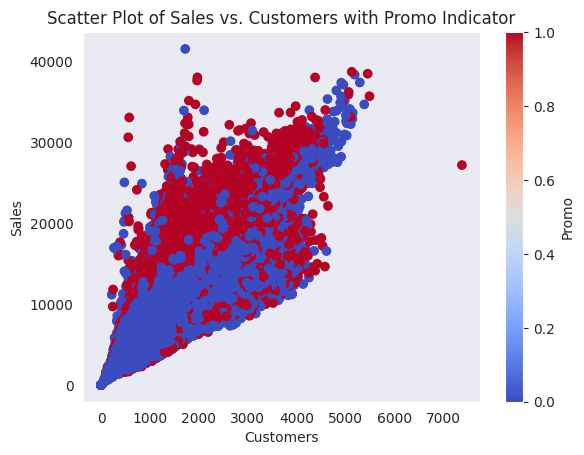

In [78]:
import matplotlib.pyplot as plt

# Scatter plot with color-coding based on 'Promo' column
plt.scatter(merge_df['Customers'], merge_df['Sales'], c=merge_df['Promo'], cmap='coolwarm')
plt.colorbar(label='Promo')  # Add color bar for promo

# Labels and titles
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.title('Scatter Plot of Sales vs. Customers with Promo Indicator')

plt.show()


**We see the linear relation of Sales and Customers with Promo.**

2. Sales and CompetitionOpenSinceYear

Text(0.5, 1.0, 'Plot between Sales and Competition Open SInce year')

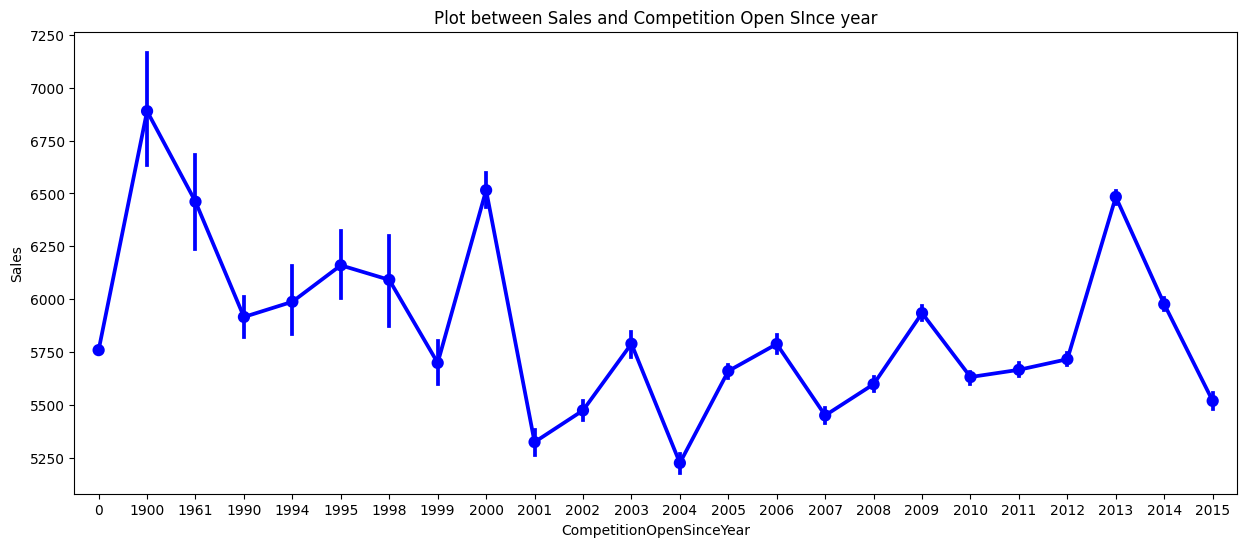

In [39]:
# My Target Variable is Sales so we compare with CompetitionOpenSinceYear
plt.figure(figsize=(15,6))
sns.pointplot(x='CompetitionOpenSinceYear',y='Sales',data = merge_df,color = 'Blue')
sns.set_style('dark')
plt.title('Plot between Sales and Competition Open SInce year')

**From above pointplot we can see that sales is highest during the year 1900 but after that due to the increasing competition of numbers of stores sales got decline year by year**

3. sales and Promo2SinceYear

Text(0.5, 1.0, 'Plot between Sales and Promo2SinceYear')

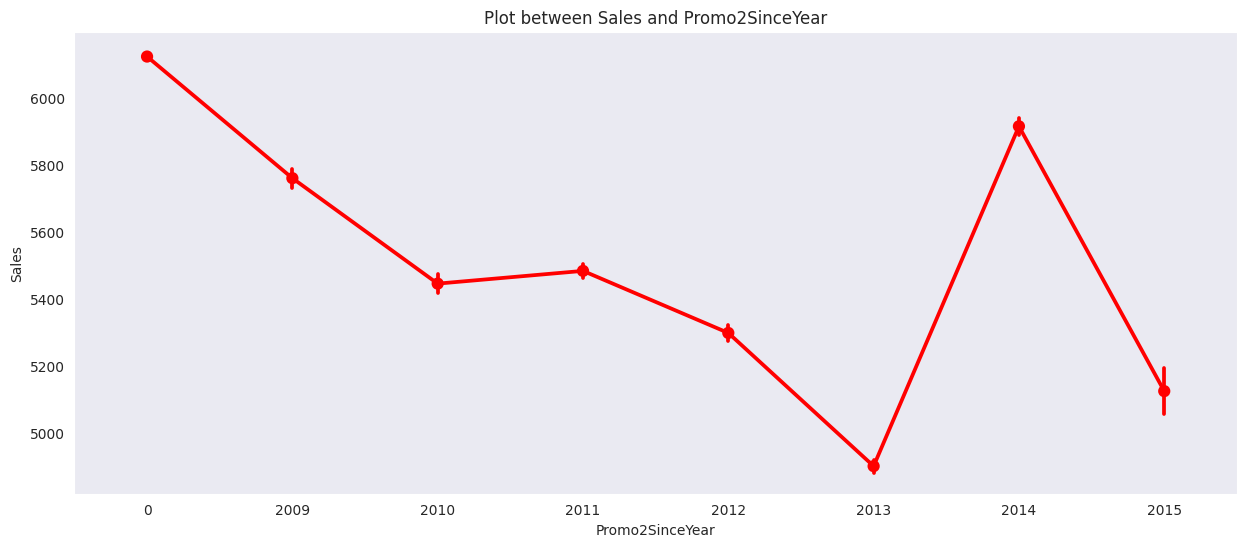

In [40]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'Promo2SinceYear', y= 'Sales', data=merge_df,color='Red')
sns.set_style("dark")
plt.title('Plot between Sales and Promo2SinceYear')


**from above we see that sales of stores is effected which continues their promotion. The Sales in 2013 and 2015 are very low inspite of promotion.The reason can be more competiton year by year**

4. Sales and DayOfWeek

Text(0.5, 1.0, 'Plot between Sales and DayOfWeek')

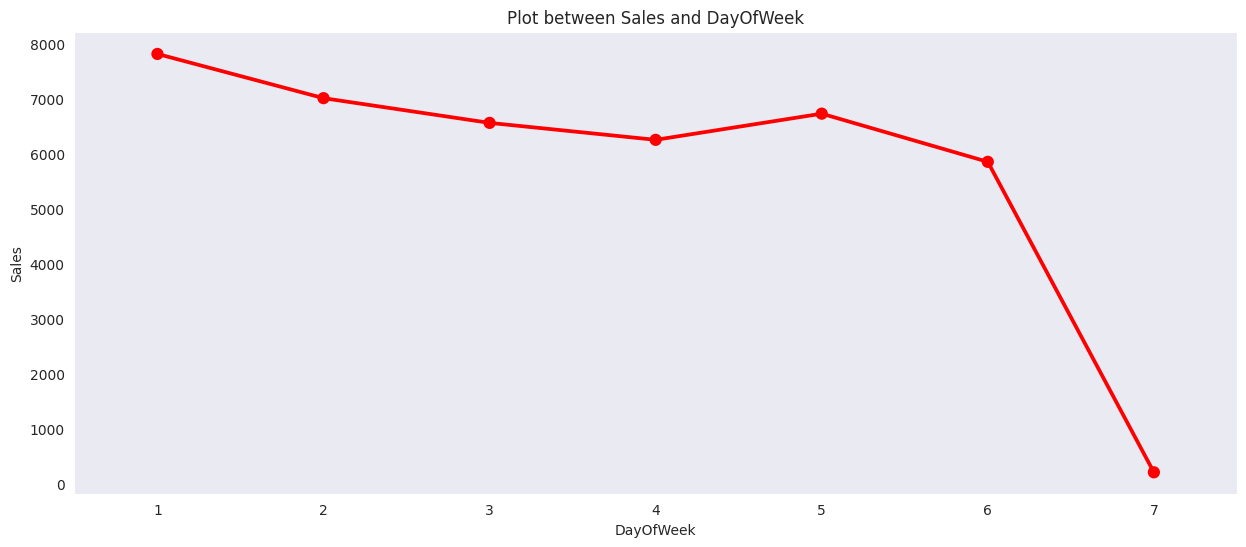

In [41]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'DayOfWeek', y= 'Sales', data=merge_df,color='Red')
sns.set_style("dark")
plt.title('Plot between Sales and DayOfWeek')

**From this graph we get insights that Maximum Sales is on Day 1 which is Monday and the same  is decreasing till Day 6 which is Saturday .As most of the stores are closed on Day 7 which is Sunday ,so the Sales is closed to Zero.**

5. Sales and CompetitionOpenSinceMonth

Text(0.5, 1.0, 'Plot between Sales and CompetitionOpenSinceMonth ')

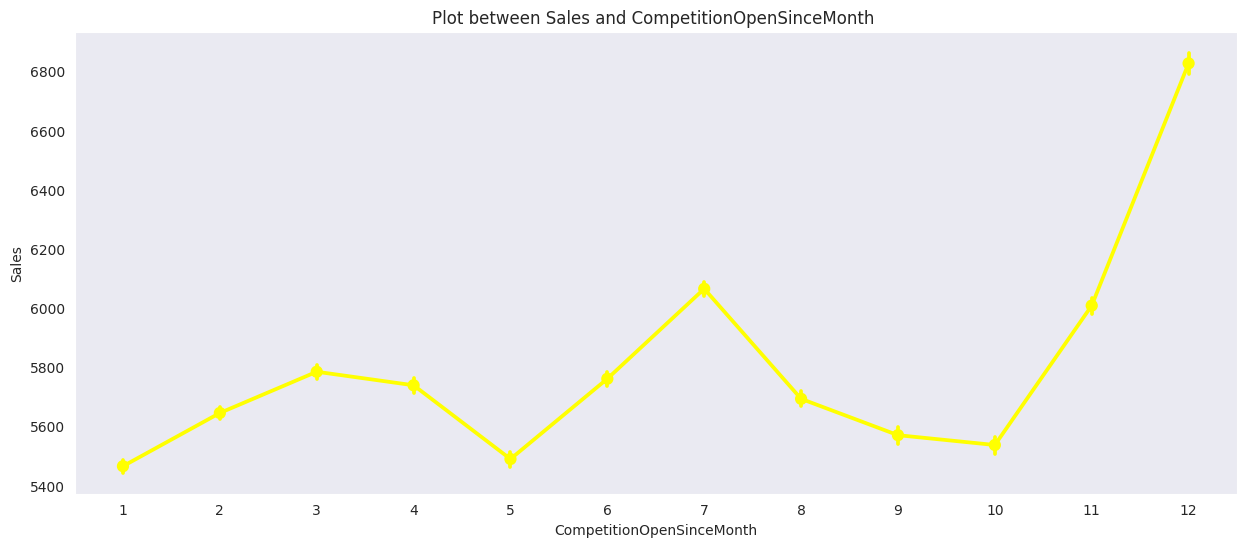

In [42]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceMonth', y= 'Sales', data=merge_df,color='Yellow')
sns.set_style("dark")
plt.title('Plot between Sales and CompetitionOpenSinceMonth ')

**From above we see that at the end of the year sales is quite high compare to othere 10 months**

6. Sales and StoreType

0    551627
3    312912
2    136840
1     15830
Name: StoreType, dtype: int64


Text(0.5, 1.0, 'Boxplot For Sales Values')

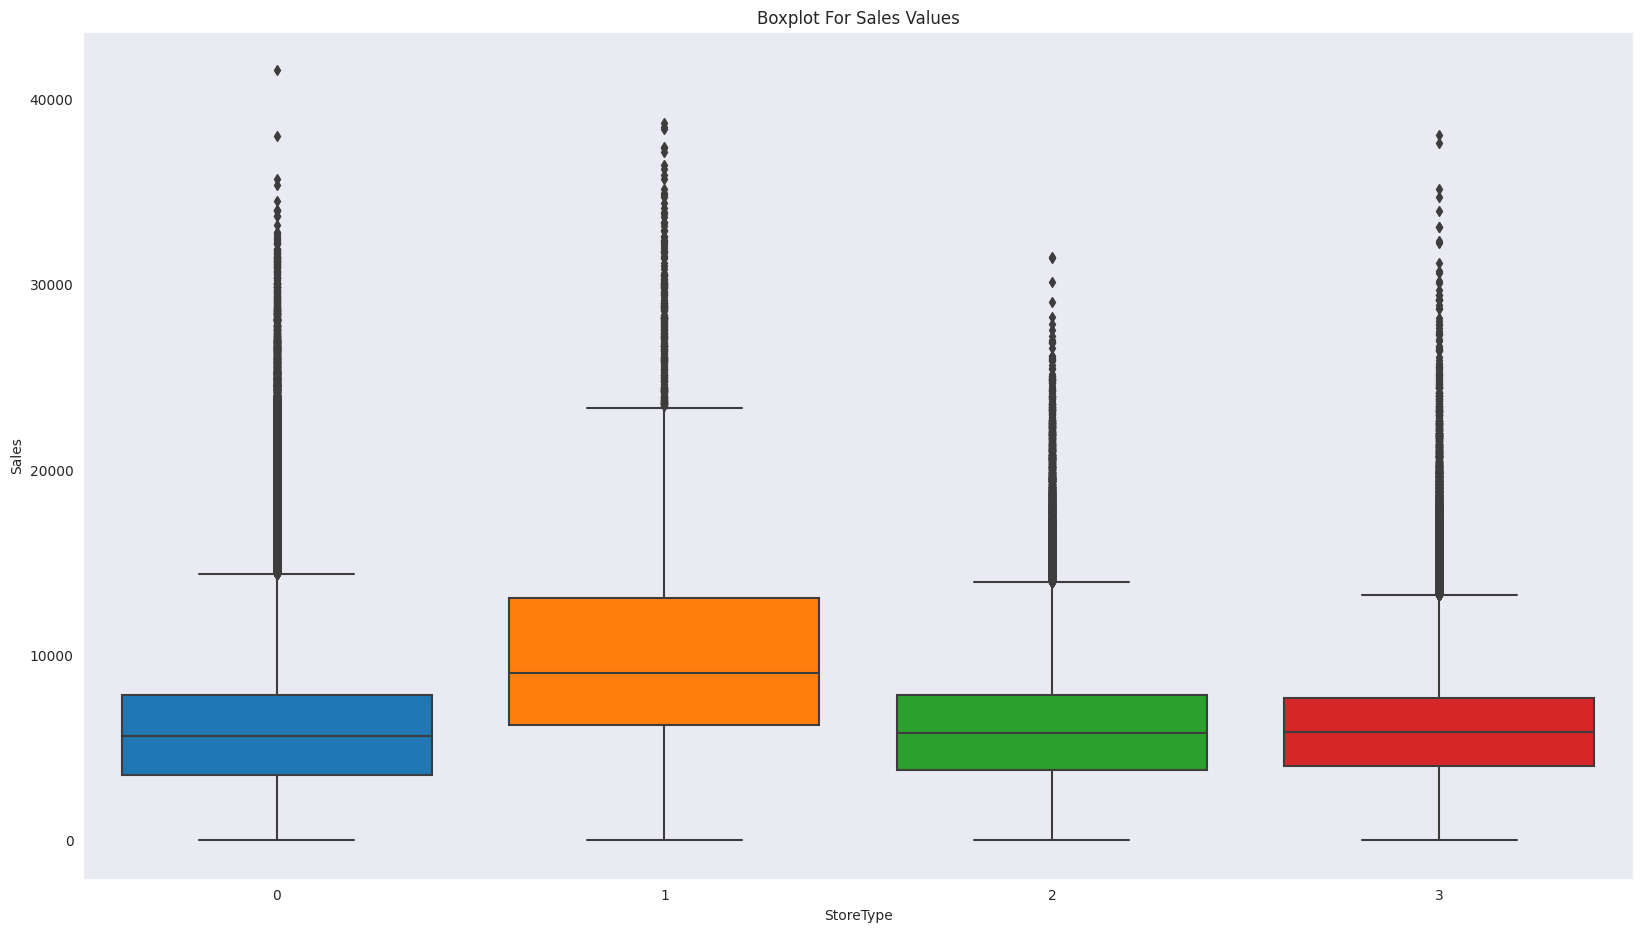

In [81]:
store_type_counts = merge_df['StoreType'].value_counts()
print(store_type_counts)
plt.figure(figsize=(20, 11))
plot_storetype_sales = sns.boxplot(x="StoreType", y="Sales", data=merge_df, saturation=1.5,width=0.8)
plt.title('Boxplot For Sales Values')

**StoreType 1(b) has high sales compare to other and remaining three have the same median though it has the least number of store**

7. Sales and Assortment

0    537445
2    471470
1      8294
Name: Assortment, dtype: int64


Text(0.5, 1.0, 'Boxplot For Sales Values on the basis of Assortment')

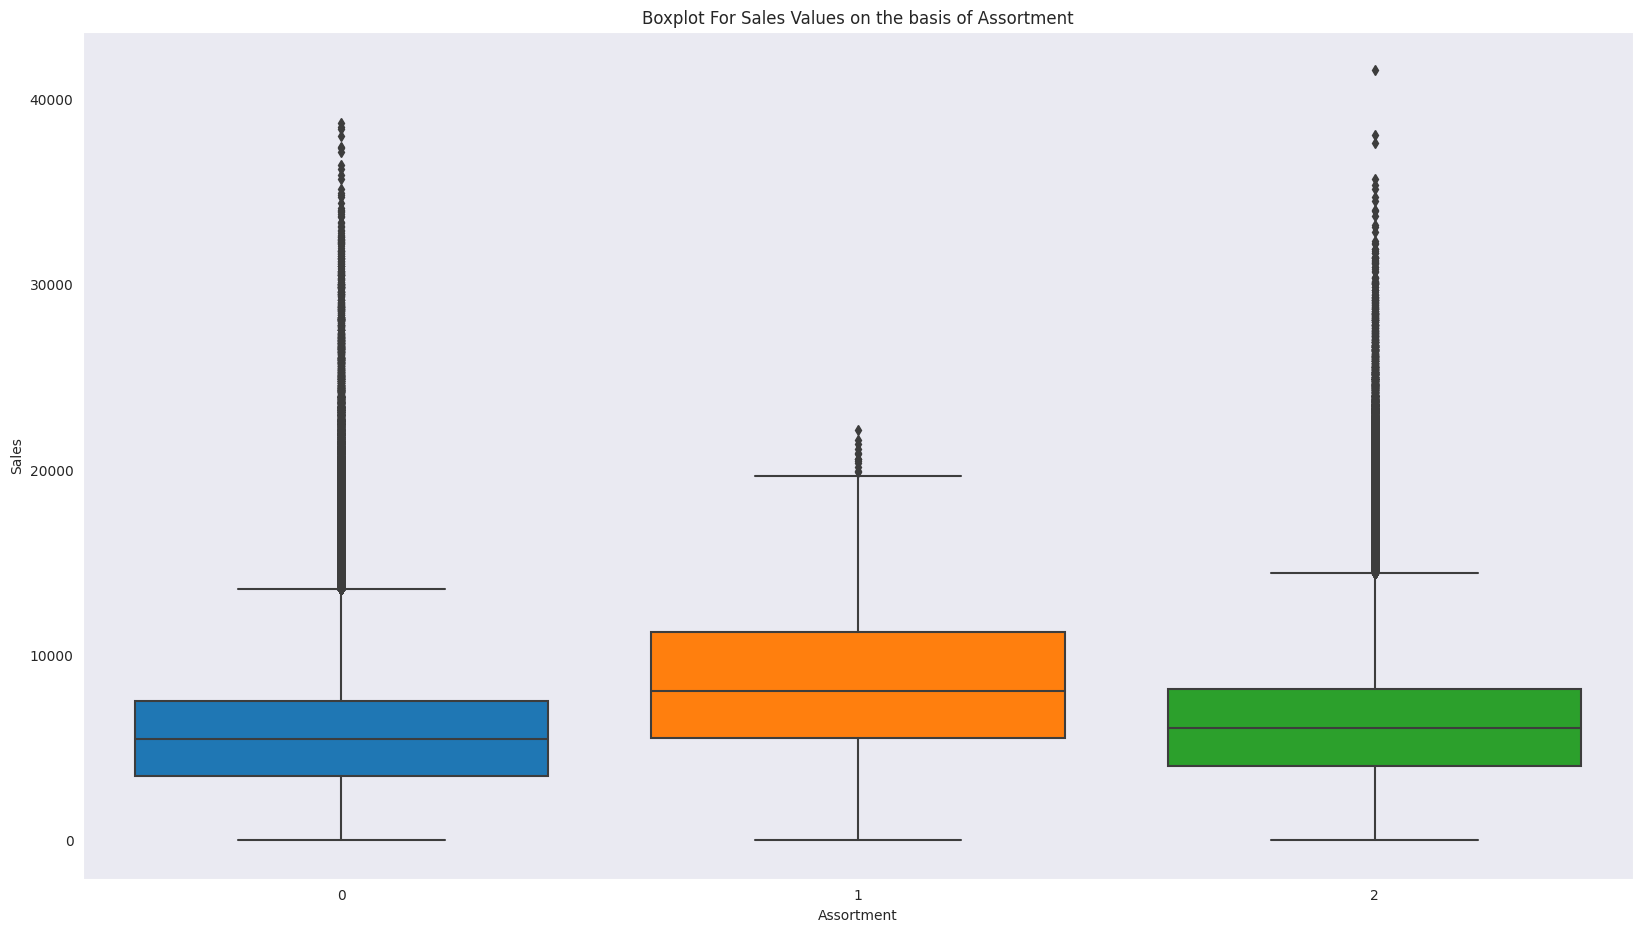

In [82]:
Assortment_counts = merge_df["Assortment"].value_counts()
print(Assortment_counts)
plt.figure(figsize=(20, 11))
plot_storetype_sales = sns.boxplot(x="Assortment", y="Sales", data=merge_df, saturation=1.5,width=0.8)
plt.title('Boxplot For Sales Values on the basis of Assortment')

**Assortment level 'Basic' have the maximum number of stores in Rossmann yet it performed very badly but at the same time 'Extra' and 'Extended' assortment level with less number of store had preformed extra ordinarily so it would be advisable to increase these assortment level.**

8. Day of week and Open

Text(0.5, 1.0, 'Store Daily Open Countplot')

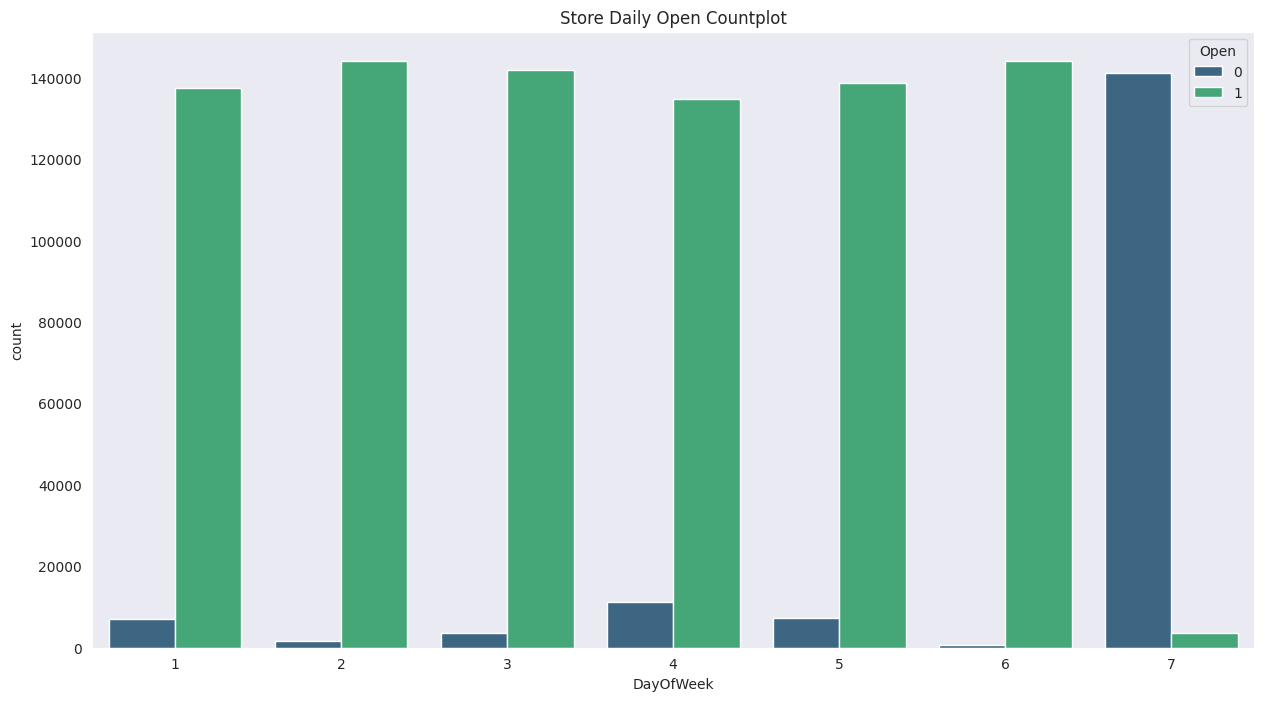

In [45]:
plt.figure(figsize=(15, 8))
sns.countplot(x= 'DayOfWeek', hue='Open', data= merge_df, palette='viridis')
plt.title('Store Daily Open Countplot')


Sunday is Weekend

9. DayofWeek and Promo

Text(0.5, 1.0, 'Store Daily Promo Countplot')

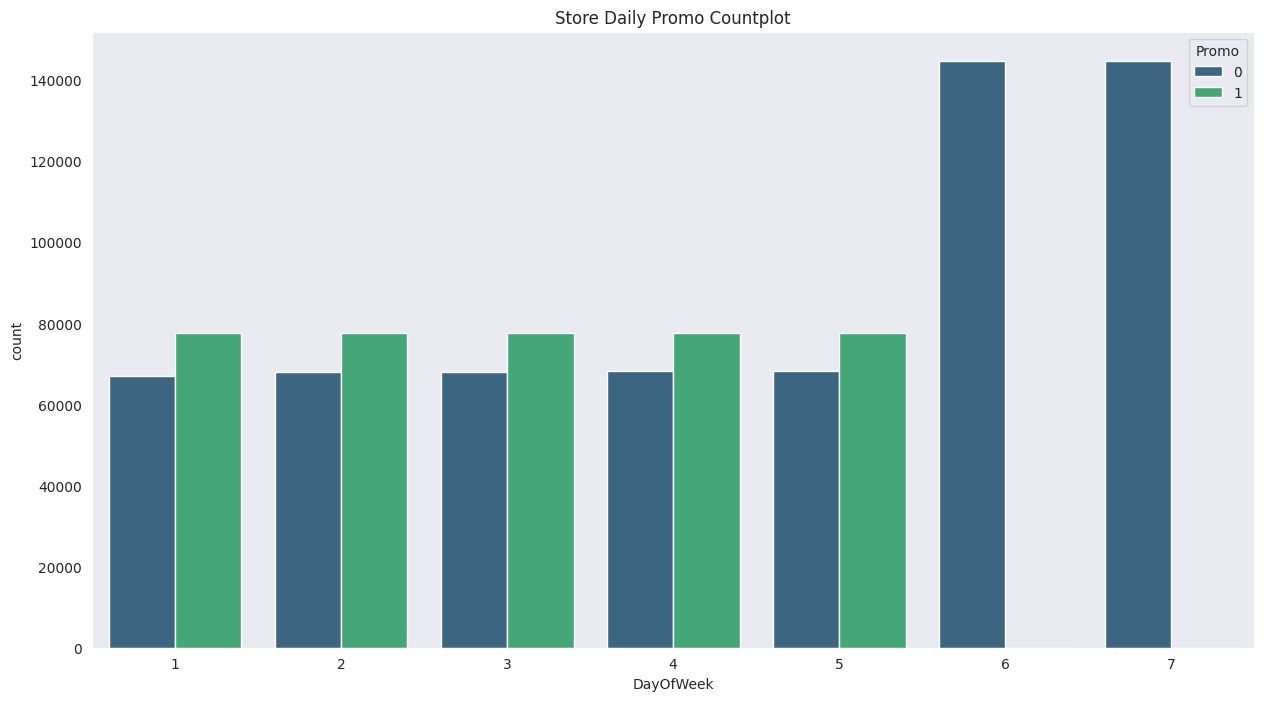

In [46]:
plt.figure(figsize=(15, 8))
sns.countplot(x= 'DayOfWeek', hue='Promo', data= merge_df, palette='viridis')
plt.title('Store Daily Promo Countplot')

**Stores with promo are making more than that of without promo**

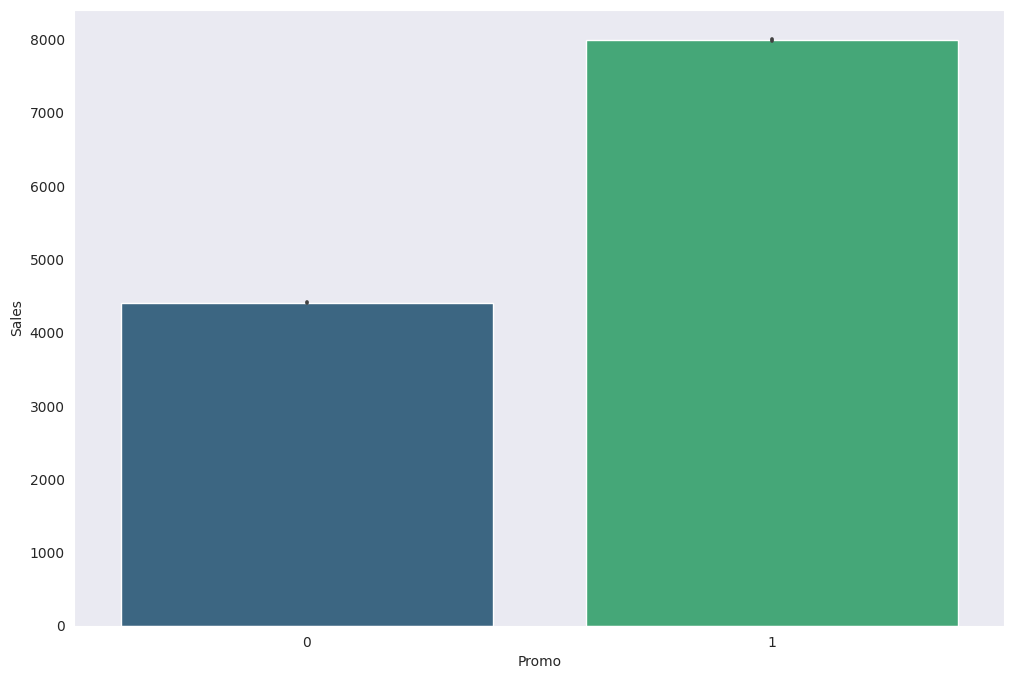

In [47]:
plt.figure(figsize=(12, 8))
promo_sales = sns.barplot(x="Promo", y="Sales", data= merge_df, palette='viridis')

**Here 0 represents the store which didnt opt for promotion and 1 represents for stores who opt for promotion. Those store who took promotions their sales are high as compared to stores who didnt took promotion.**

10. State holiday and sales (0 = public holiday, 1 = Easter holiday, 2 = Christmas, 3 = None)


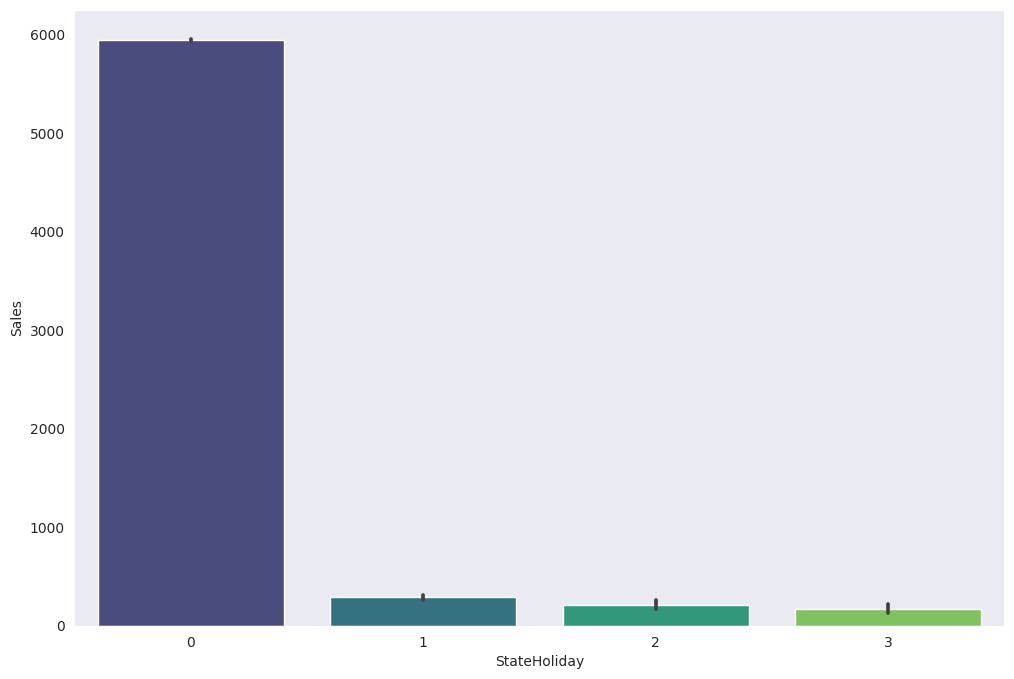

In [48]:
plt.figure(figsize=(12, 8))
stateholiday_sales = sns.barplot(x="StateHoliday", y="Sales", data=merge_df,palette='viridis')

From above we see that on public holiday sales is very high compare to other.

11. School Holiday and  Sales ( 0 = 'Not Holiday', 1 = 'Holiday')

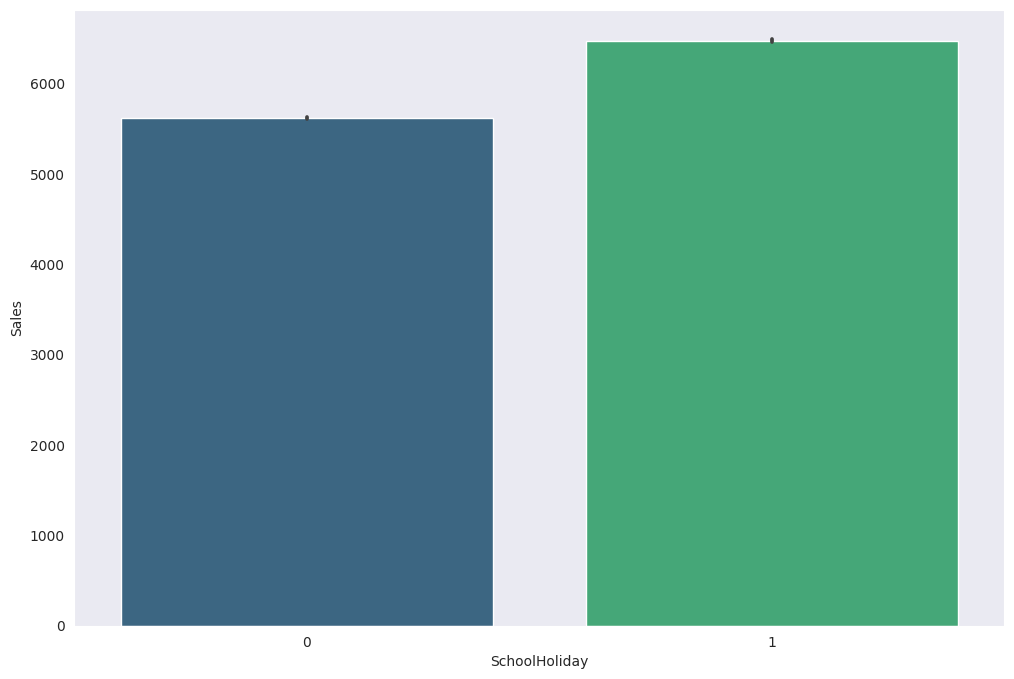

In [49]:
plt.figure(figsize=(12, 8))
stateholiday_sales = sns.barplot(x="SchoolHoliday", y="Sales", data=merge_df,palette='viridis')

**We can observe that most of the stores remain closed during State and Holidays. But it is interesting to note that the number of stores opened during School Holidays were more than that were opened during State Holidays. Another important thing to note is that the stores which were opened during School holidays had more sales than normal.**

# **Conclusion of EDA**


1)We see the linear relation of Sales and Customers with Promo.

2)From plot sales and competition Open Since Month shows sales go increasing from November and highest in month December.

3)From plot Sales and day of week, Sales highest on Monday and start declining from Tuesday to Saturday and on Sunday Sales almost near to Zero.

4)Plot between Promotion and Sales shows that promotion helps in increasing Sales.

5)Type of Store plays an important role in opening pattern of stores.

6)All Type ‘b’ stores never closed except for refurbishment or other reason.

7)All Type ‘b’ stores have comparatively higher sales and it mostly constant with peaks appears on weekends.

8)Assortment Level ‘b’ is only offered at Store Type ‘b’.

9)Assortment level 'Basic' have the maximum number of stores in Rossmann yet it performed very badly but at the same time 'Extra' and 'Extended' assortment level with less number of store had preformed extra ordinarily so it would be advisable to increase these assortment level.

10)We can observe that most of the stores remain closed during State Holidays. But it is interesting to note that the number of stores opened during School Holidays were more than that were opened during State Holidays.

# **Feature Engineering & Data Pre-processing**

<ipython-input-50-80cd20545b0c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = merge_df.corr()


<Axes: >

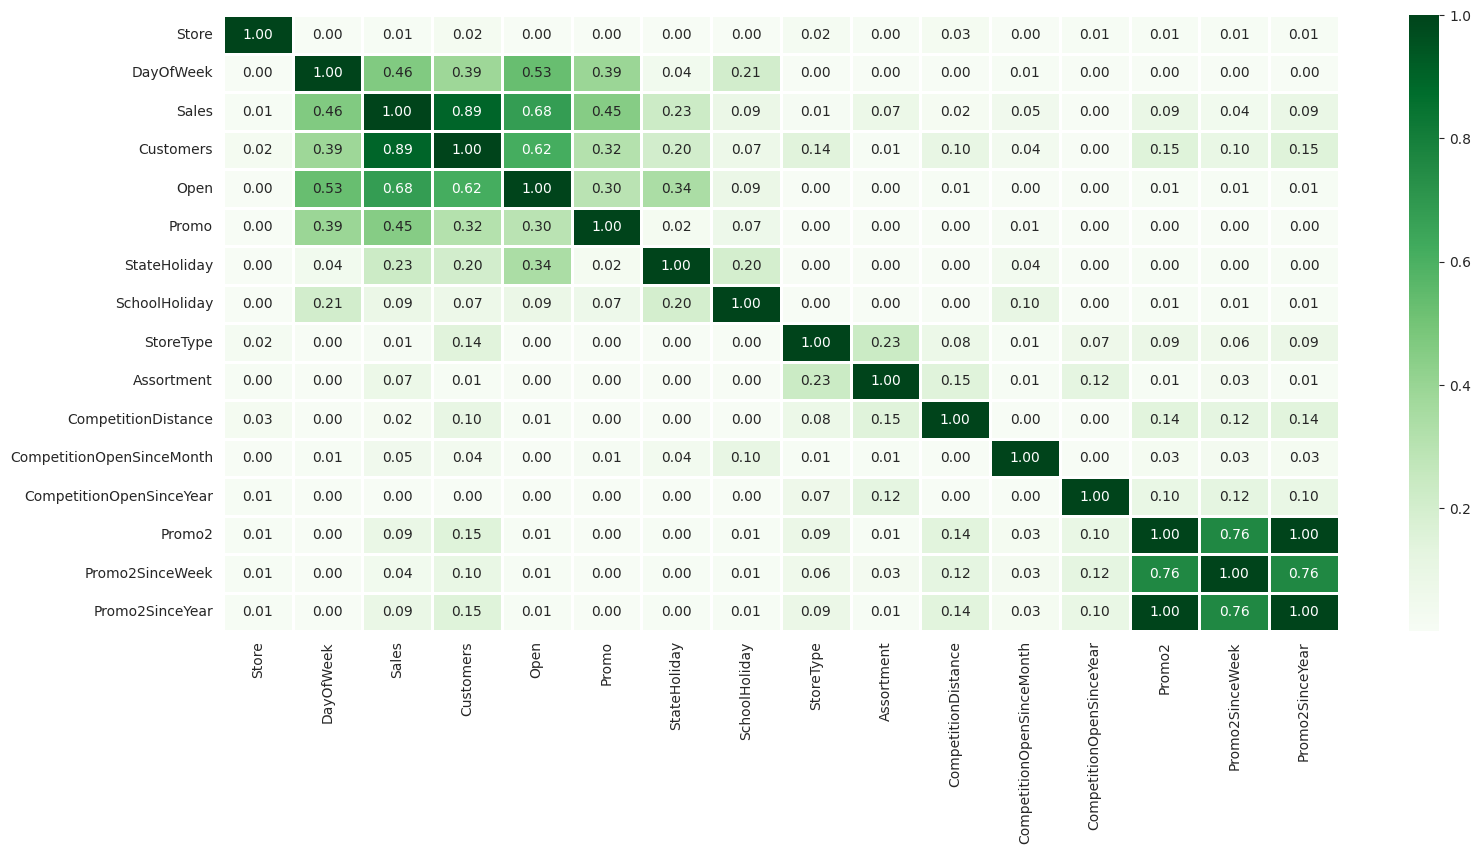

In [50]:
plt.figure(figsize=(18,8))
correlation = merge_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='Greens',linewidths=2,fmt=".2f")

# **Multicollinearity**

**Multicollinearity is a statistical term that refers to the situation where two or more predictor variables in a regression model are highly correlated with each other.**

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [52]:
calc_vif(merge_df[[i for i in merge_df.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,3.698820e+00
1,DayOfWeek,4.104634e+00
2,Customers,5.236586e+00
3,Open,9.374439e+00
4,Promo,1.917193e+00
5,StateHoliday,1.187974e+00
6,SchoolHoliday,1.330848e+00
7,StoreType,1.940267e+00
8,Assortment,2.045386e+00
9,CompetitionDistance,1.589466e+00


**In above table we can see that VIF(Variance Inflation Factor) value for column Promo2 and Promo2SinceYear is Higher .So we will drop either Promo2 or Promo2SinceYear and again check VIF value.Here we drop Promo2 column.**

In [83]:
calc_vif(merge_df[[i for i in merge_df.describe().columns if i not in ['Sales','Promo2']]])

,variables,VIF
0,Store,3.696388
1,DayOfWeek,4.104282
2,Customers,5.236066
3,Open,9.373305
4,Promo,1.917150
5,StateHoliday,1.187974
6,SchoolHoliday,1.330831
7,StoreType,1.934410
8,Assortment,2.039789
9,CompetitionDistance,1.583028


As we know that VIF factor below 10 is look good for Machine Learning Model.

# **Analysis of Target Variable i.e 'Sales'.**

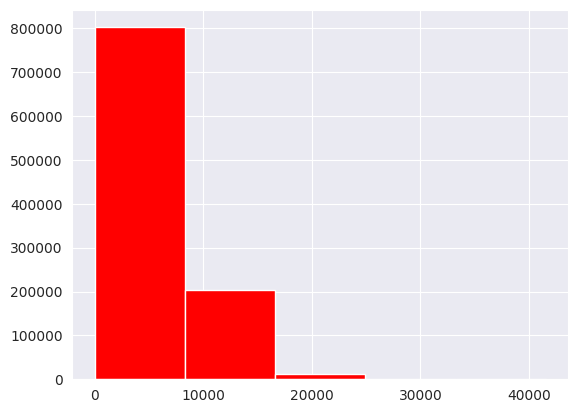

In [84]:
pd.Series(merge_df['Sales'],).hist(bins=5, color="red")
plt.show()

In [85]:
merge_df[(merge_df.Open == 0) & (merge_df.Sales == 0)].count()[0]

172817

So we will drop thoose store which sales is 0 assuming that the stores were closed temoprarily and this will help to train the model more accurately.

In [86]:
new_df = merge_df.drop(merge_df[(merge_df.Open == 0) & (merge_df.Sales == 0)].index)

In [111]:
new_df.shape

(844392, 18)

In [112]:
new_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,1,1,1,0,150,1,2006,0,0,0,0
1016827,733,2,2013-01-01,10765,2377,1,0,1,1,1,1,860,1,1999,0,0,0,0
1016863,769,2,2013-01-01,5035,1248,1,0,1,1,1,1,840,1,0,1,48,2012,"Jan,Apr,Jul,Oct"
1017042,948,2,2013-01-01,4491,1039,1,0,1,1,1,1,1430,1,0,0,0,0,0


In new_df dataset,column name 'PromoInterval' change into dummies it means that each new column will have a binary value (0 or 1).

In [113]:
new_df = pd.get_dummies(new_df, columns=['PromoInterval'])

In [114]:
new_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620,7,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910,7,2015,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,1,1,1,...,150,1,2006,0,0,0,1,0,0,0
1016827,733,2,2013-01-01,10765,2377,1,0,1,1,1,...,860,1,1999,0,0,0,1,0,0,0
1016863,769,2,2013-01-01,5035,1248,1,0,1,1,1,...,840,1,0,1,48,2012,0,0,1,0
1017042,948,2,2013-01-01,4491,1039,1,0,1,1,1,...,1430,1,0,0,0,0,1,0,0,0


In [115]:
new_df.to_csv('clean_data.csv', index=False)

In [116]:
merge_df.to_csv('clean_data_with_zeros.csv', index=False)

# **Model Training**
# **Model 1** :Model training with new_df which exclude all sales= 0

In [117]:
# Define the Variable
Id = new_df.columns.drop(['Promo2SinceYear','Date','Sales']) #our independent variable
d = 'Sales'  #our dependent variable


In [118]:
X = new_df[Id].values
y = new_df[d].values

In [119]:
#splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state = 0)


In [120]:
print(X_train.shape)

(675513, 18)


In [121]:
print(X_test.shape)

(168879, 18)


**1. Linear Regression**

In [122]:
#We first train our model with Linear Regression
reg = LinearRegression().fit(X_train,y_train)

In [123]:
# Regression Score
reg.score(X_train, y_train)

0.7635183725690666

In [124]:
#intercept of different Id columns
reg.intercept_

700.1749140828606

In [125]:
# coefficient of different Id columns
reg.coef_

array([-1.61160602e-01, -6.85548194e+01,  6.35504984e+00, -6.79767354e-12,
        1.29645838e+03, -1.28102415e+03,  3.62329515e+01,  2.76744096e+02,
        2.22217335e+02,  2.88849353e-02,  2.99491278e+01,  8.39884213e-02,
       -4.31860944e+01,  1.24902145e+01,  4.31860944e+01,  3.16962854e+01,
        1.38838509e+02, -2.13720889e+02])

In [126]:
# Predicting on Train Dataset
y_pred_train = reg.predict(X_train)
y_pred_train

array([5490.61068489, 6804.3787408 , 6699.04311466, ..., 7913.72781806,
       6884.64407492, 6123.05554455])

In [127]:
# Dependent variable with train dataset
y_train

array([5409, 7339, 7807, ..., 4817, 6194, 5862])

In [128]:
# Predicting Dependent Variable with test dataset
y_pred_test= reg.predict(X_test)
y_pred_test

array([5324.59975349, 4849.47506442, 7238.44230268, ..., 4098.19887156,
       7772.83233987, 5368.22125565])

In [129]:
# Original Test dependent Value
y_test

array([ 5495,  5472,  7969, ...,  2938, 10413,  5828])

In [130]:
# Calculate MSE and RMSE for Test Prediction
MSE = mse(y_test,y_pred_test)
print(MSE)
RMSE = np.sqrt(MSE)
print(RMSE)

2265528.631712661
1505.1673102059656


In [131]:
r2 = r2_score(y_test,y_pred_test)
print(r2)

0.7634783399226589


In [132]:
pd.DataFrame(zip(y_test, y_pred_test), columns = ['actual', 'pred'])

,actual,pred
0,5495,5324.599753
1,5472,4849.475064
2,7969,7238.442303
3,7384,6085.227240
4,13212,7829.105207
...,...,...
168874,16337,16398.115914
168875,9195,7062.744213
168876,2938,4098.198872
168877,10413,7772.832340


**2. Lasso**

In [133]:
from sklearn.model_selection import cross_val_score
L1 = Lasso(alpha = 0.4, max_iter = 10000,selection='cyclic',tol= 0.0001,)

In [134]:
L1.fit(X_train,y_train)

Lasso(alpha=0.4, max_iter=10000)

In [135]:
y_pred_lasso = L1.predict(X_test)

In [136]:
L1.score(X_test,y_test)

0.7634691535325336

In [137]:
cv = cross_val_score(L1,X,y,cv=10)
mean_cv = cv.mean()

In [138]:
print(cv)
print(mean_cv)

[0.73075467 0.74886334 0.760761   0.75799899 0.75829695 0.76481454
 0.76725115 0.75273622 0.7581241  0.78478933]
0.7584390301539468


In [139]:
# Hyperparameter tunning
parameters = {'alpha':[0.1,0.2,0.3,0.4,0.5]}
#Perform Grid Search to find the best alpha value
lasso_cv =GridSearchCV(L1,parameters,cv=5)
lasso_cv.fit(X,y)

GridSearchCV(cv=5, estimator=Lasso(alpha=0.4, max_iter=10000),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]})

In [140]:
# Extract the best alpha value and corresponding score
best_alpha_lasso = lasso_cv.best_params_["alpha"]
best_score_lasso = lasso_cv.best_score_

In [141]:
print(best_alpha_lasso)
print(best_score_lasso)

0.2
0.7605720937492583


In [142]:
pd.DataFrame(zip(y_test,y_pred_lasso),columns=['actual','pred'])

,actual,pred
0,5495,5326.691753
1,5472,4855.673283
2,7969,7238.384055
3,7384,6081.070695
4,13212,7828.210761
...,...,...
168874,16337,16396.316028
168875,9195,7062.612459
168876,2938,4103.045275
168877,10413,7775.470708


**3. Ridge**

In [143]:
L2 = Ridge(alpha=0.5)

In [144]:
L2.fit(X_train,y_train)

Ridge(alpha=0.5)

In [145]:
L2.predict(X_test)

array([5324.60052372, 4849.47909241, 7238.44267842, ..., 4098.20177963,
       7772.83051021, 5368.22254699])

In [146]:
L2.score(X_test, y_test)

0.7634783364876163

In [147]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score

ridge = Ridge(max_iter=10000, solver='auto')

# define the range of alpha values to test
parameters = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]}

# perform grid search to find the best alpha value
ridge_cv = GridSearchCV(L2, parameters, cv=5)
ridge_cv.fit(X, y)

# extract the best alpha value and corresponding score
best_alpha = ridge_cv.best_params_['alpha']
best_score = ridge_cv.best_score_

# perform cross-validation with the best alpha value
ridge_best = Ridge(alpha=best_alpha, max_iter=10000, solver='auto')
cv_scores = cross_val_score(ridge_best, X, y, cv=5)

# find the maximum score and corresponding alpha value
max_score = cv_scores.max()
max_alpha = best_alpha

print("Best alpha value: ", best_alpha)
print("Best score: ", best_score)
print("Maximum CV score: ", max_score)
print("Corresponding alpha value: ", max_alpha)


Best alpha value:  0.5
Best score:  0.7605702635648154
Maximum CV score:  0.7700304608182428
Corresponding alpha value:  0.5


**4. Decision Tree**

In [148]:
sales_mean = merge_df[d].mean()

In [149]:
sales_mean

5773.818972305593

In [150]:
sales_mean_new = new_df[d].mean()
sales_mean_new

6955.514290755952

In [151]:
#DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
y_train_dt = dt.predict(X_train)
MSE  = mse(y_test, y_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean_new
print("RMPSE :",RMPSE)

r2 = r2_score(y_test, y_pred_dt)
print("R2 :" ,r2)


MSE : 2006697.3608355538
RMSE : 1416.5794580028166
RMPSE : 0.2036627916767399
R2 : 0.7905003784044686



# **Model 2** :Model training with merge_df by taking whole dataset

In [87]:
#In merge_df dataset,column name 'PromoInterval' change into dummies it means that each new column will have a binary value (0 or 1)
merge_df = pd.get_dummies(merge_df,columns=['PromoInterval'])
merge_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620,7,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910,7,2015,0,0,0,1,0,0,0


In [88]:
#define the Variable
indep = merge_df.columns.drop(['Store','Promo2SinceYear','Date','Sales'])
dep = 'Sales'

In [89]:
U = merge_df[indep].values
V = merge_df[dep].values

In [90]:
# splitting the dataset
U_train, U_test, v_train, v_test = train_test_split(U, V, test_size=0.2, random_state = 0)
print(U_train.shape)
print(U_test.shape)

(813767, 17)
(203442, 17)


In [98]:
sales_mean = merge_df["Sales"].mean()

**1. Linear Regression**

In [91]:
# scaling the x values
scaler = StandardScaler()
U_train = scaler.fit_transform(U_train)
U_test = scaler.transform(U_test)

In [92]:
# fitting the data into the Linear Regression Model
lr = LinearRegression()
lr.fit(U_train,v_train)

LinearRegression()

In [93]:
v_pred=lr.predict(U_test)
v_pred

array([ 7101.66614705, 12611.33802205,  9204.59583455, ...,
        6938.9200533 ,  5999.9747408 ,  4007.9825533 ])

In [94]:
lr.score(U_train,v_train)

0.8677978490444807

In [95]:
df = pd.DataFrame(zip(v_test,v_pred), columns = ['actual','pred'])
df

,actual,pred
0,7285,7101.666147
1,6221,12611.338022
2,8132,9204.595835
3,20916,11526.502085
4,5472,6593.181772
...,...,...
203437,5650,6655.935678
203438,5464,6520.869272
203439,6191,6938.920053
203440,5663,5999.974741


In [99]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(v_test, v_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred)
print("R2 :" ,r2)

MSE : 1944268.5102740775
RMSE : 1394.370291663616
RMPSE : 0.24149878933714092
R2 : 0.8684236859866605


**2. Decision Tree**

In [100]:
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(U_train,v_train)
v_pred_dt = dt.predict(U_test)
v_train_dt = dt.predict(U_train)

MSE  = mean_squared_error(v_test, v_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred_dt)
print("R2 :" ,r2)

MSE : 1938797.0529188653
RMSE : 1392.4069279197317
RMPSE : 0.24115874338951052
R2 : 0.8687939610732938


In [101]:
df = pd.DataFrame(zip(v_test, v_pred_dt), columns = ['actual', 'pred'])
df


,actual,pred
0,7285,6405.437098
1,6221,10731.775506
2,8132,9096.411096
3,20916,11835.110635
4,5472,5476.684725
...,...,...
203437,5650,5476.684725
203438,5464,5476.684725
203439,6191,8169.463222
203440,5663,6405.437098


In [105]:
# Define the Decision Tree regressor
dt_model = DecisionTreeRegressor()

# Define hyperparameters and their possible values for tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(U_train, v_train)

# Get the best hyperparameters
best_params_dt = grid_search.best_params_

# Train a Decision Tree model with the best hyperparameters
best_dt_model = DecisionTreeRegressor(**best_params_dt)
best_dt_model.fit(U_train, v_train)


DecisionTreeRegressor(min_samples_leaf=4, min_samples_split=10)

In [106]:
v_pred_dt = best_dt_model.predict(U_test)
v_train_dt = best_dt_model.predict(U_train)

MSE  = mean_squared_error(v_test, v_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred_dt)
print("R2 :" ,r2)

MSE : 331185.0981360213
RMSE : 575.4868357625753
RMPSE : 0.09958890077839187
R2 : 0.9775873989427823


**3. Random Forest Regressor**

In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create a random forest regressor with n_estimators=500, max_depth=8, and n_jobs=2
random_forest = RandomForestRegressor(n_estimators=500, max_depth=8, n_jobs=2)

# Fit the random forest to the training data
random_forest.fit(U_train, v_train)

# Make predictions on the test data
v_pred_rf = random_forest.predict(U_test)

# Calculate the mean squared error (MSE) between the predicted and actual values
MSE = mean_squared_error(v_test, v_pred_rf)
print("MSE:", MSE)

# Calculate the root mean squared error (RMSE)
RMSE = np.sqrt(MSE)
print("RMSE:", RMSE)

# Calculate the root mean squared percentage error (RMPSE)
sales_mean = np.mean(v_test)
RMPSE = RMSE / sales_mean
print("RMPSE:", RMPSE)

# Calculate the coefficient of determination (R2 score)
r2 = r2_score(v_test, v_pred_rf)
print("R2:", r2)


MSE: 1120740.8925834536
RMSE: 1058.650505399895
RMPSE: 0.18320113265763915
R2: 0.9241550460592691


**4. xgb**

In [103]:
import xgboost as xgb

xgboost = xgb.XGBRegressor(n_estimators=500, max_depth=8, n_jobs=2)
xgboost.fit(U_train, v_train)
v_pred_xgb = xgboost.predict(U_test)

MSE = mean_squared_error(v_test, v_pred_xgb)
print("MSE :", MSE)

RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

RMPSE = RMSE/sales_mean
print("RMPSE :", RMPSE)

r2 = r2_score(v_test, v_pred_xgb)
print("R2 :", r2)

MSE : 177545.44218920538
RMSE : 421.3614151642333
RMPSE : 0.07291725467712691
R2 : 0.9879848000779321


In [ ]:
# Define the XGBoost regressor
xgb_model = xgb.XGBRegressor()

# Define hyperparameters and their possible values for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5]
}

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(U_train, v_train)

# Get the best hyperparameters
best_params_xgb = grid_search.best_params_

# Train an XGBoost model with the best hyperparameters
best_xgb_model = xgb.XGBRegressor(**best_params_xgb)
best_xgb_model.fit(U_train, v_train)


**5. Neural Network**

In [110]:
import tensorflow as tf
from tensorflow import keras

# Define a basic neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(U_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer with 1 neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(U_train, v_train, epochs=50, batch_size=32, verbose=0)

# Predict using the neural network
nn_predictions = model.predict(U_test).flatten()

# Calculate RMSE and R-squared
nn_mse = mean_squared_error(v_test, nn_predictions)
nn_rmse = np.sqrt(nn_mse)
nn_r2 = r2_score(v_test, nn_predictions)

print(f"Neural Network - RMSE: {nn_rmse}, R-squared: {nn_r2}")


6358/6358 [==============================] - 10s 2ms/step
Neural Network - RMSE: 862.2155978473523, R-squared: 0.9496901266673726


Neural Network with Hyperparameter tuning

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Define a function to create a Keras model for tuning
def create_model(activation='relu', optimizer='adam'):
    model = keras.Sequential([
        keras.layers.Dense(64, activation=activation, input_shape=(X_train.shape[1],)),
        keras.layers.Dense(32, activation=activation),
        keras.layers.Dense(1)  # Output layer with 1 neuron for regression
    ])
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Create a KerasRegressor wrapper for use with GridSearchCV
nn_model = keras.wrappers.scikit_learn.KerasRegressor(build_fn=create_model, verbose=0)

# Define hyperparameters and their possible values for tuning
param_grid = {
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'rmsprop'],
    'epochs': [50, 100],
    'batch_size': [32, 64]
}

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(nn_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params_nn = grid_search.best_params_

# Create and train a Neural Network model with the best hyperparameters
best_nn_model = create_model(activation=best_params_nn['activation'], optimizer=best_params_nn['optimizer'])
best_nn_model.fit(X_train, y_train, epochs=best_params_nn['epochs'], batch_size=best_params_nn['batch_size'], verbose=0)


In [152]:
import pickle
pickle.dump(merge_df,open('merge_df.pkl','wb'))
pickle.dump(xgboost,open('xgboost.pkl','wb'))

 # Conclusion from Model training

1. We saw that Sales column contains 172817 rows with 0 sale. So we created a   new dataframe in which we removed 0 sales rows and tried to train our model. We used various algorithms and got accuracy score around **76%.**



2. We were also curious about the total dataset(including Sales = 0 rows). So we trained another model using various algorithms and we got accuracy near about **98%** which is far better than previous model.




3. we came to conclusion that removing sales=0 rows actually removes lot of information from dataset as it has **172817**   rows which is quite large and therefore we decided not to remove those values.We got our best rmpse score from **Random Forest model,Xgboost**,we tried taking an optimum parameter so that our model doesnt overfit.


# **# Future Work**

We are ready for deployment on a live server for a real user interaction.

# **Thank You **